>Mohon maaf mengumpulkan terlambat, dikarenakan ada kendala jaringan tidak stabil. Terima kasih🙏🙏

# **Multiple Linear Regression - Advertising**

Menganalisis dataset, untuk dapat mengambil keputusan. Dalam konteks ini, dataset dianalisis untuk menemukan fitur mana yang paing berpengaruh atau berkorelasi terhadap penjualan sehingga dapat dijadikan model prediksi.

## Tahapan:
## 1. Data Preparation
## 2. Exploratory Data Analysis
## 3. Modeling
## 4. Evaluasi Model
## 5. Visualisasi Grafik



---




## 1. Data Preparation

### 1.1 Import library (pandas, numpy, matplotlib, seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Import dataset

In [2]:

df = pd.read_csv('Advertising.csv')

### 1.3  Membaca Data

In [3]:
# 5 data teratas
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# 5 data terbawah
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

### 1.4 Menghapus kolom yang tidak di perlukan

In [8]:
df = df.drop(columns=['Unnamed: 0'])


Kami menghapus kolom yang tidak diperlukan, seperti 'Unnamed: 0', karena bisa mengganggu model.

In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### 1.5 Cek data hilang dan duplikat

In [11]:
print('data hilang:\n', df.isnull().sum(),'\n')
print('data duplikat:', df.duplicated().sum())

data hilang:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64 

data duplikat: 0


 ### 1.6 Cek nilai outlier

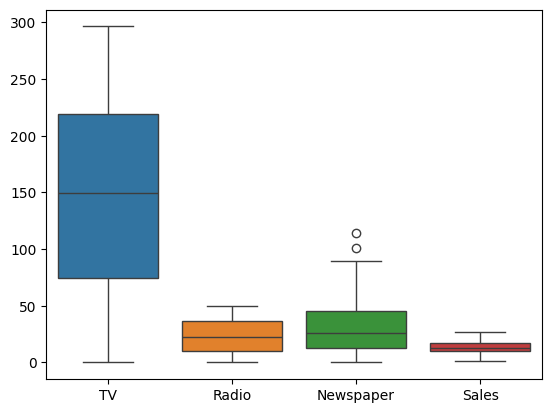

In [12]:
sns.boxplot(df)
plt.show()

Terdapat 2 outlier yang ada di column newspaper

### 1.7 Menangani nilai outlier dengan menggantinya ke median menggunakan IQR

In [ ]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)

IQR = Q3-Q1

bawah = Q1-1.5*IQR
atas = Q3+1.5*IQR

df.loc[(df['Newspaper'] < bawah) | (df['Newspaper'] > atas), 'Newspaper'] = df['Newspaper'].median() # Menggunakan median, karena tidak terlalu berpengaruh pada nilai ekstrem. Sehingga mengambil nilai tengah.

Kami menggunakan metode IQR, karena metode ini dapat menemukan nilai yang diluar rata - rata atau ploa, pada sebaran data, dan berfokus pada nilai tengah (Antara Q1 - Q3). Dengan menggunakan batas atas dan bawah IQR, data atau pola bisa lebih stabil dan mengatasi outlier.

## 2. Exploratory Data Analysis

### 2.1 Mengecek korelasi antar fitur

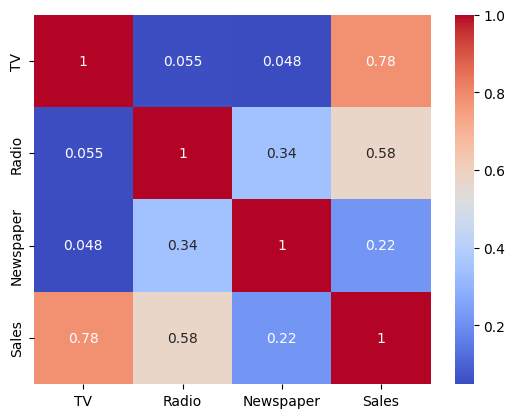

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Dapat dilihat, TV memiliki hubungan korelasi yang paling tinggi dengan sales, selanjutnya diikuti Radio dan Newspaper. Artinya, semakin tinggo biaya iklan TV, semakin tinggi penjualan.

## 3. Modeling

### 3.1 Menentukan Independent dan Dependent

In [15]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

### 3.2 Split data


In [16]:
def split_data_train_test(X, y, train_size=0.8, random_state=0):
  np.random.seed(random_state)
  idx = np.random.permutation(len(X))
  split = int(0.8 * len(X))

  X_train = df.drop('Sales', axis=1).iloc[idx[:split]].values
  X_test  = df.drop('Sales', axis=1).iloc[idx[split:]].values
  y_train = df['Sales'].iloc[idx[:split]].values
  y_test  = df['Sales'].iloc[idx[split:]].values

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data_train_test(X, y)

Kami membaginya menjadi 80% untuk training, dan 20% untuk test, supaya tidak terjadinya overfitting dan underfitting

In [17]:
print(X_train.shape)
print(X_train[:5])


(160, 3)
[[ 69.2  20.5  18.3]
 [ 50.   11.6  18.4]
 [ 90.4   0.3  23.2]
 [289.7  42.3  51.2]
 [170.2   7.8  35.2]]


In [18]:
print(y_train.shape)
print(y_train[:5])


(160,)
[11.3  8.4  8.7 25.4 11.7]


In [19]:
print(X_test.shape)
print(X_test[:5])

(40, 3)
[[ 78.2  46.8  34.5]
 [121.    8.4  48.7]
 [112.9  17.4  38.6]
 [ 17.9  37.6  21.6]
 [ 80.2   0.    9.2]]


In [20]:
print(y_test.shape)
print(y_test[:5])


(40,)
[14.6 11.6 11.9  8.   8.8]


### 3.3 menentukan Bias, Koofesien, dan Prediksi

- Bias --> Prediksi penjualan jika biaya iklan bernilai 0.
- Koefisien --> Menentukan seberapa besar pengaruh fitur dengan sales. Dilihat dari jumlah yang dihasilkan, yang nilainya paling besar, maka hasil dari penjualannya juga semakin besar.

In [21]:
def bias(X):
  return np.c_[np.ones(X.shape[0]), X]

def linear_regression(X_train, y_train, X_test):
  X_train_b, x_test_b = bias(X_train), bias(X_test)
  beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
  y_pred = X_test @ beta

  return beta, y_pred

beta, y_pred = linear_regression(X_train, y_train, X_test)

## 4. Evaluasi

### 4.1 Menghitung R Squared, MSE, MAE, RMSE

In [22]:
r = 1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
mse = np.mean((y_test-y_pred)**2)
mae = np.mean(np.abs(y_test-y_pred))
rmse = np.sqrt(mse)

print('R Squared:', r)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

R Squared: 0.8236422558106209
MSE: 4.33063635737079
MAE: 1.6381354966171677
RMSE: 2.0810181059689965


Machine learning ini bekerja lumayan optimal dengan nilai R-squared sebesar 82% yang berarti si model dapat menjelaskan 82% varian Sales dengan perbedaan antara train dan test yang ditunjukan oleh MAE sebesar 1.63 dan ukuran kesalahan unit ditunjukan oleh RMSE sebesar 2.08.

## 5. Visualisasi Grafik

### 5.1 Visualisasi scatter plot

Text(0, 0.5, 'y_pred')

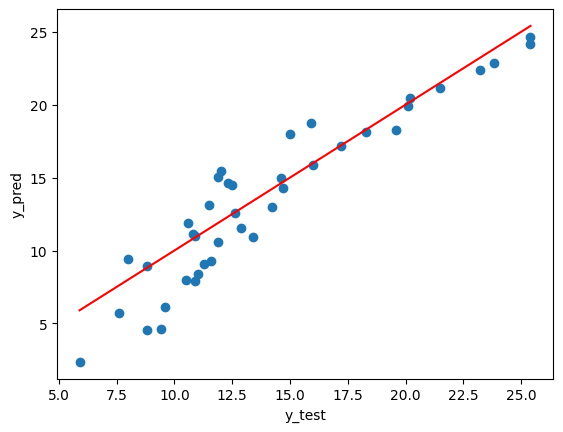

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Model regresi linear bisa memprediksi nilai penjualan dengan cukup baik, karena sebagian besar titik berada dekat dengan garis merah. Semakin dekat titik-titik terhadap garis tersebut, semakin kecil error yang dihasilkan.